In [1]:
! pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import MinMaxScaler,FunctionTransformer

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [3]:
df_train=pd.read_csv("train.csv")
df_train.drop("Id",axis=1,inplace=True) ## reduntatnt


Deleting the resuntant column which is "Id" since pandas dataframe already gives us index to use.

In [4]:
output_col=df_train['SalePrice']
df_train=df_train.drop('SalePrice',axis=1)

In [5]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [6]:
df_train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object

# PREPROCESSING


## EDA

In [7]:
df_train.columns[df_train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

<AxesSubplot:>

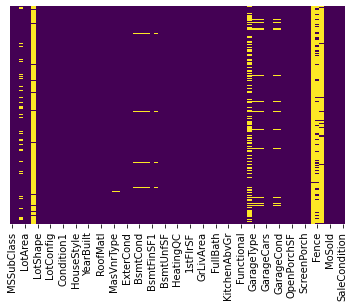

In [8]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

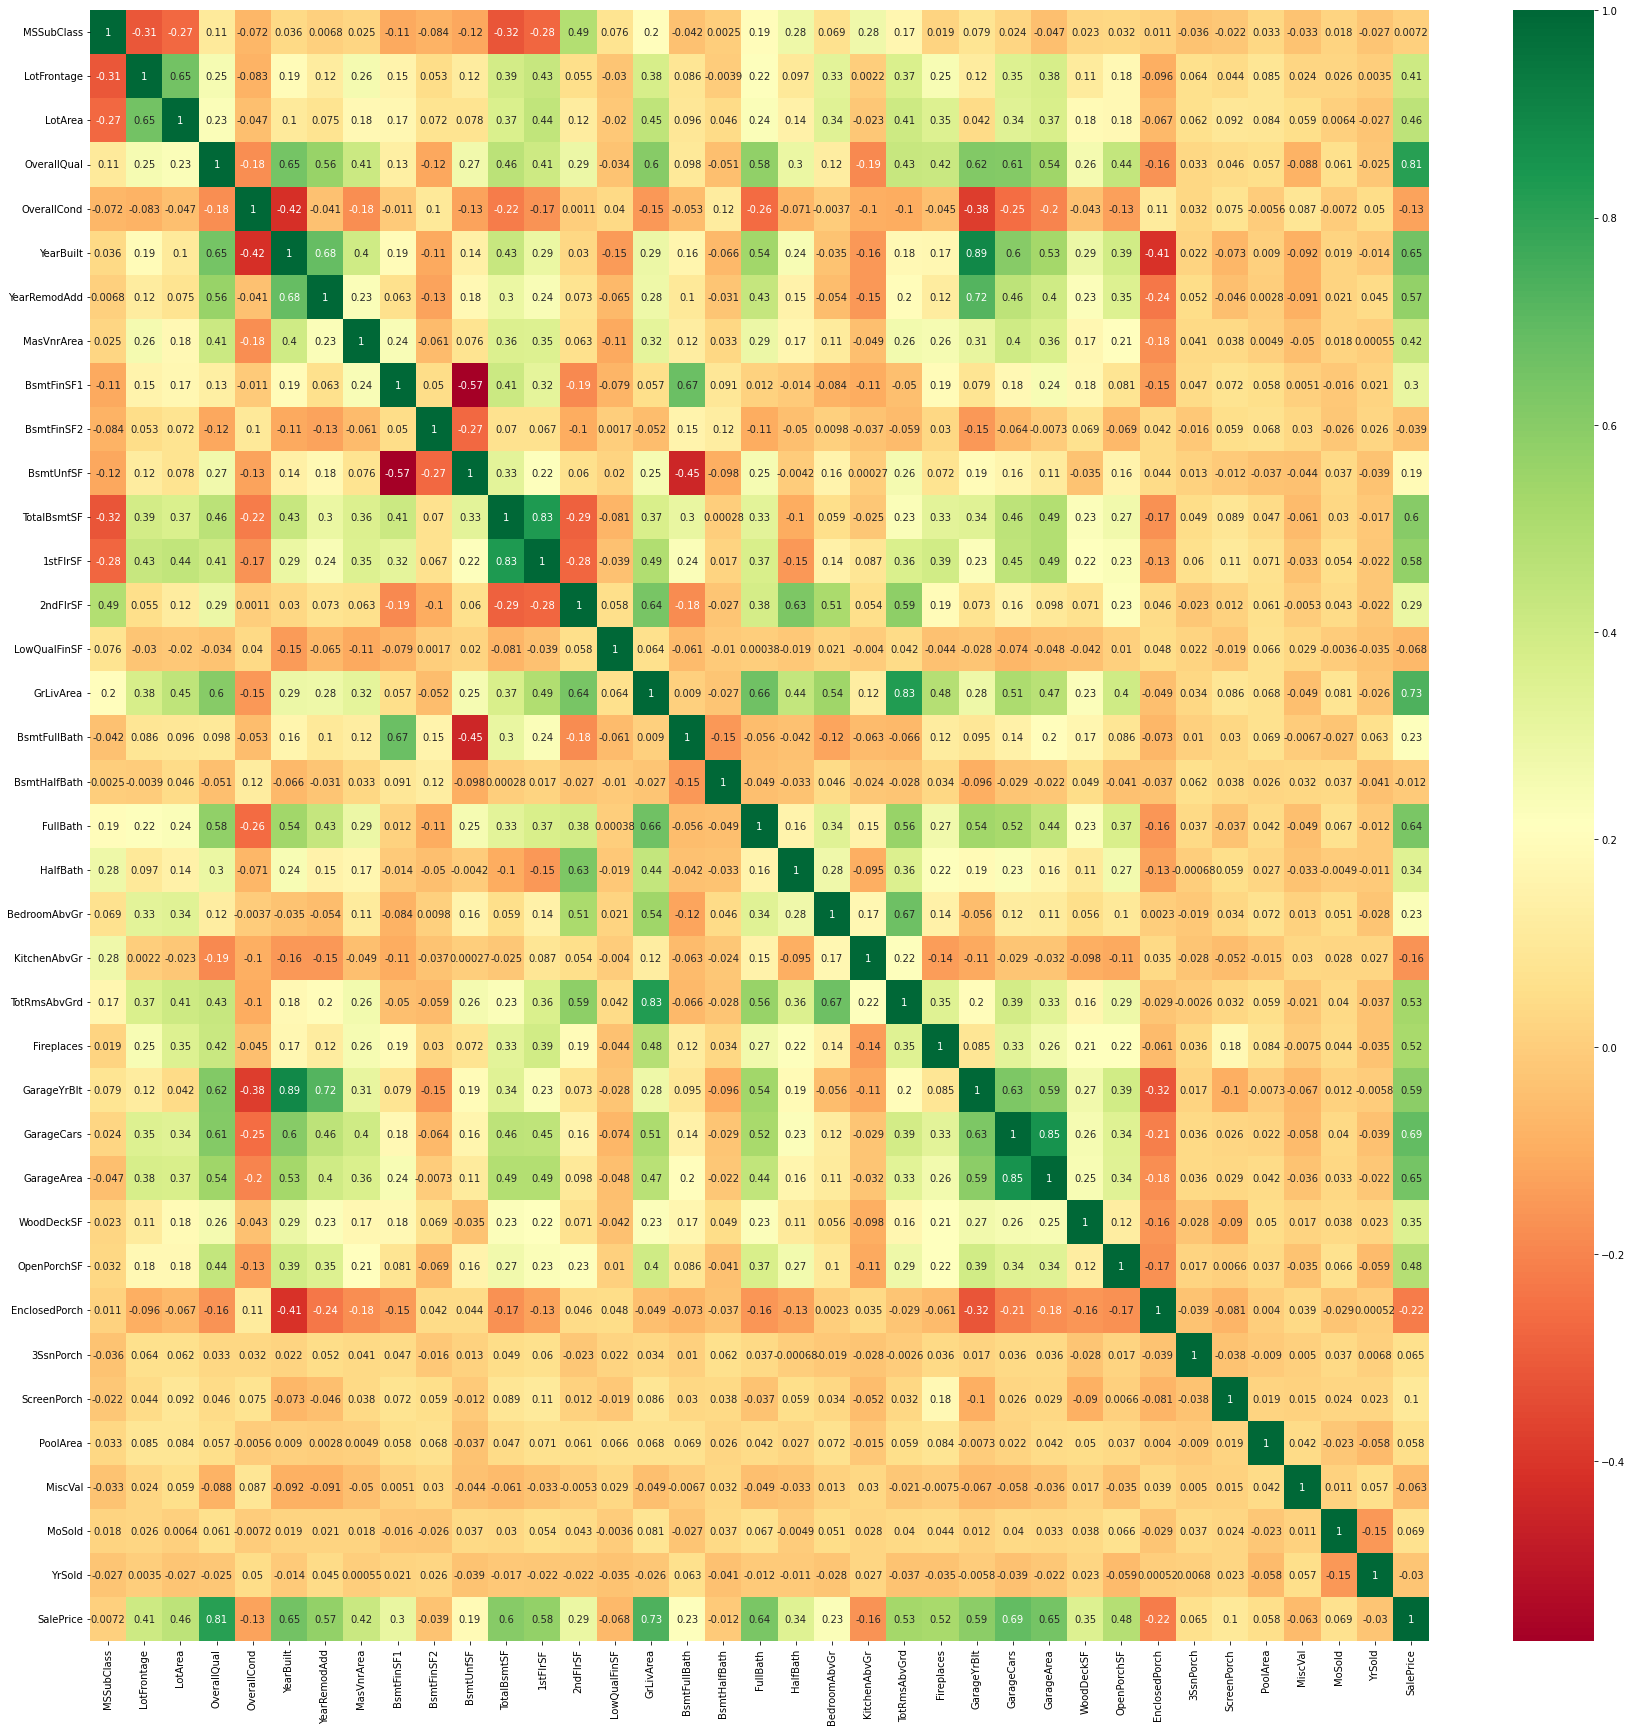

In [9]:
plt.figure(figsize=(30,30))
sns.heatmap(pd.concat([df_train,output_col],axis=1).loc[:,list(pd.concat([df_train,output_col],axis=1).select_dtypes(include= np.number).columns)].corr(method='spearman'),annot=True,cmap="RdYlGn")
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seab

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seab

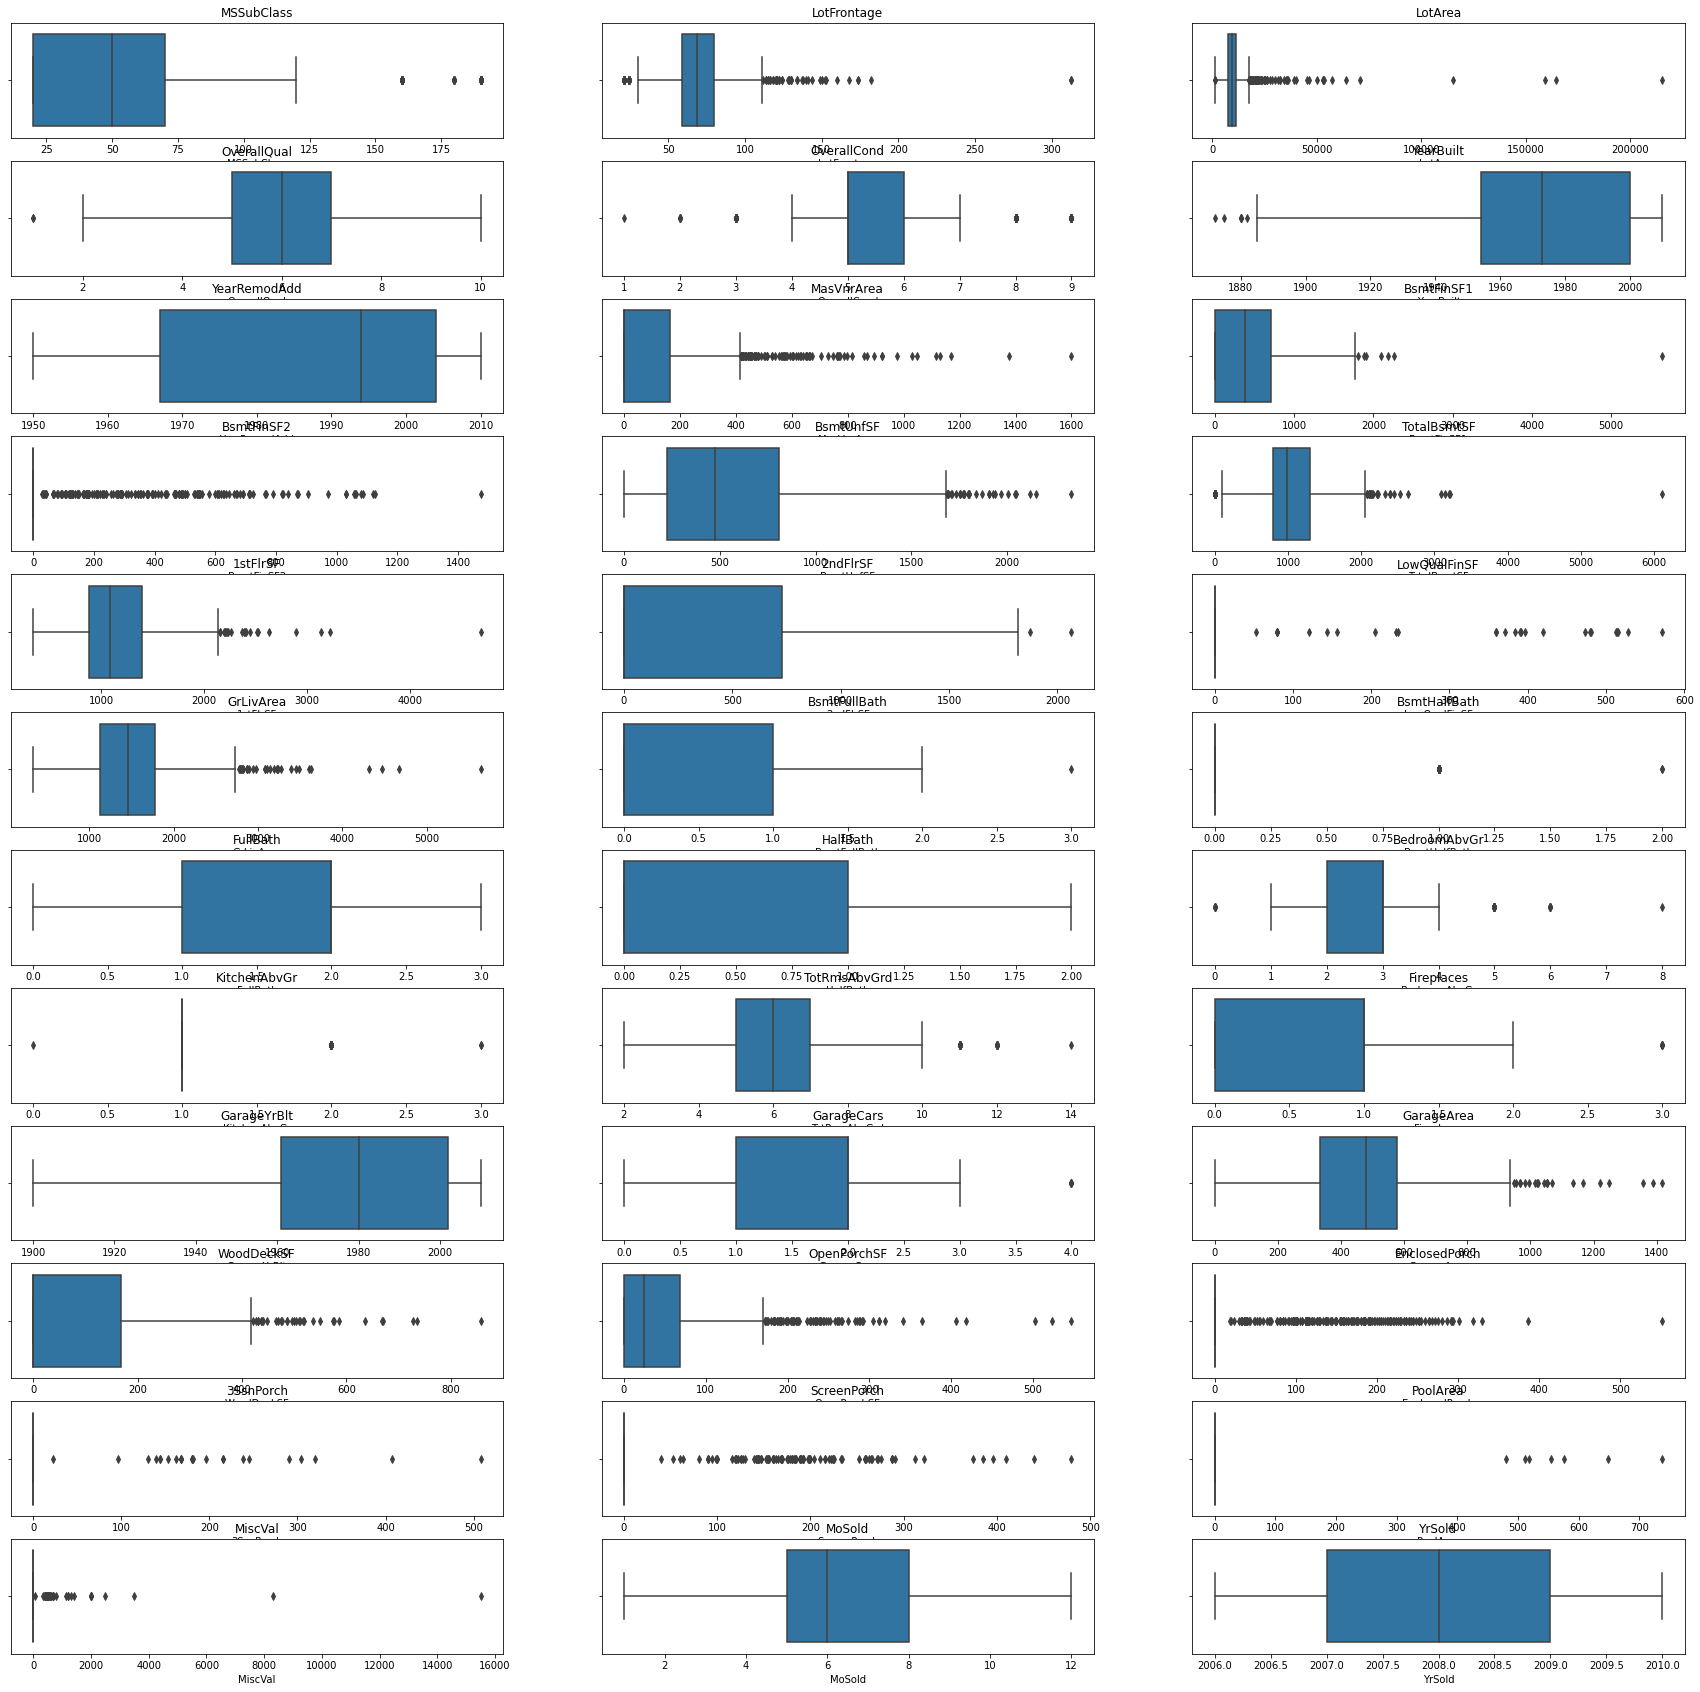

In [10]:
fig, axes = plt.subplots(nrows = 12, ncols = 3)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(30,30)
cols=list(df_train.select_dtypes(include= np.number).columns)
for ax, col in zip(axes, cols):
    print()
    sns.boxplot(df_train[col], ax = ax)
    ax.set_title(col)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

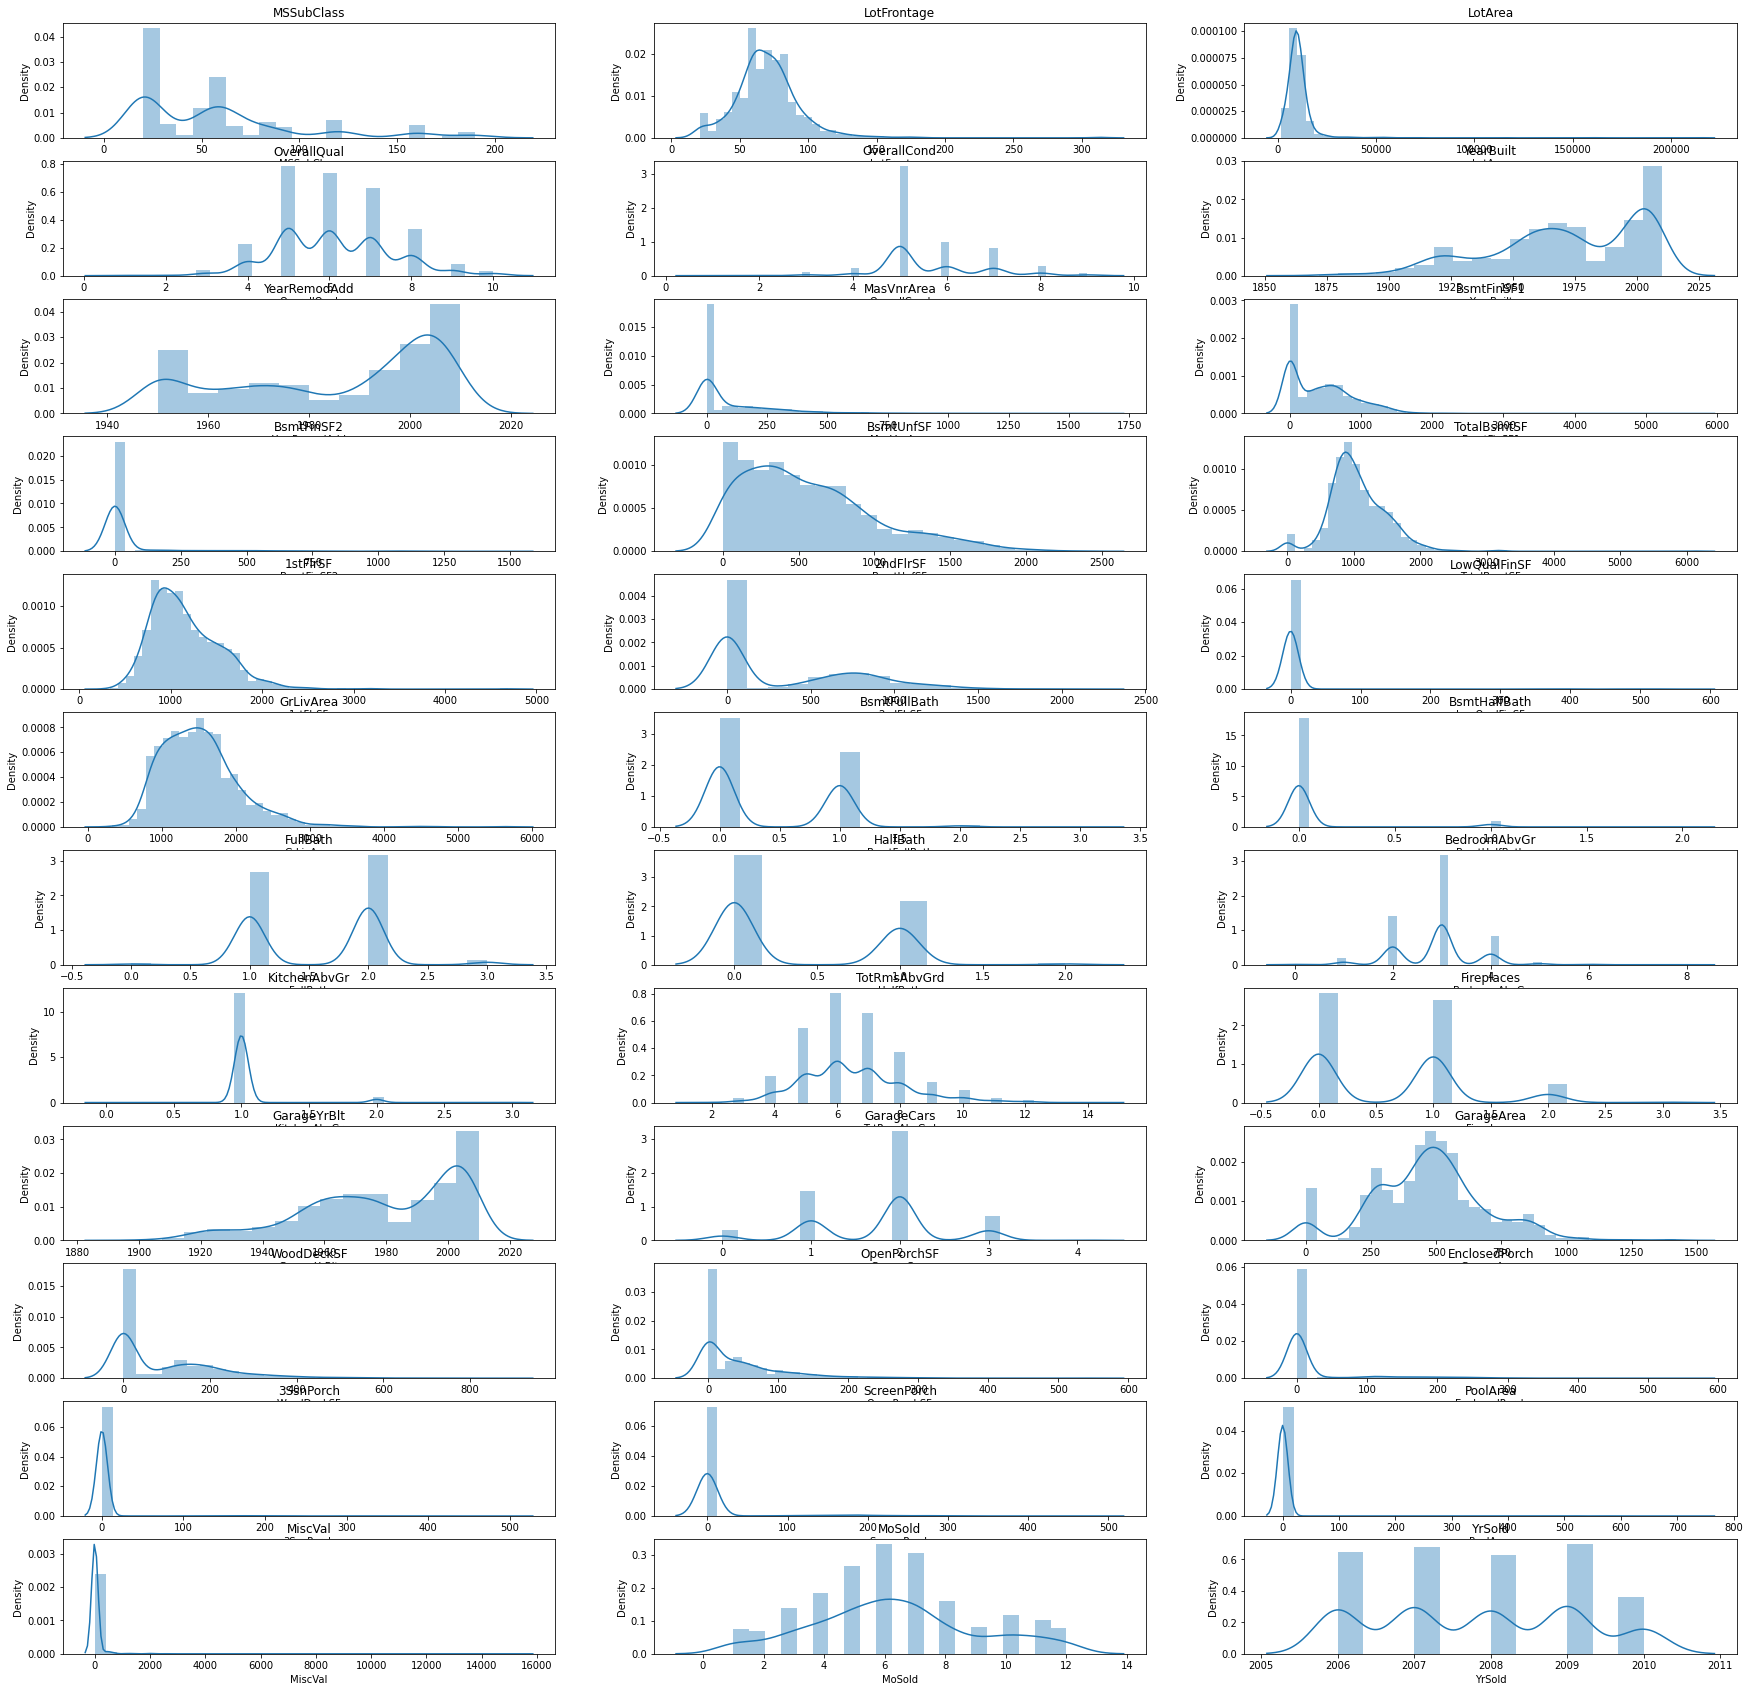

In [11]:
fig, axes = plt.subplots(nrows = 12, ncols = 3)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(30,30)
cols=list(df_train.select_dtypes(include= np.number).columns)
for ax, col in zip(axes, cols):
    print()
    sns.distplot(df_train[col], ax = ax)
    ax.set_title(col)

In [12]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [13]:
negative_values_cols=dict()

for cols in df_train.columns:
    if df_train[cols].dtypes=='int64' or df_train[cols].dtypes=='float64':
        c=0
        for values in df_train[cols]:
            if values<0:
                c+=1
        if c!=0:
            negative_values_cols[cols]=c
print(negative_values_cols)
 

{}


In [14]:
# Columns which have zero values in more than 50% rows are removed
def column_with_most_reduntant_values(reduntant_value,df_train:pd.DataFrame,threshold:float):
    reduntant_counts={}
    columns_with_most_reduntant_counts=[]
    for col in df_train.columns:
        if df_train[col].dtypes=='int64' or df_train[col].dtypes=='float64':
            for values in df_train[col]:
                if values==reduntant_value:
                    reduntant_counts[col]=1+reduntant_counts.get(col,0)
    for col in reduntant_counts:
        if reduntant_counts[col]>=(threshold*len(df_train)):
            columns_with_most_reduntant_counts.append(col)
    df_train.drop(columns_with_most_reduntant_counts,axis=1,inplace=True)

In [15]:
column_with_most_reduntant_values(reduntant_value=0,df_train=df_train,threshold=0.5)

In [16]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageCond,PavedDrive,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,TA,Y,61,NaN,NaN,NaN,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,TA,Y,0,NaN,NaN,NaN,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,TA,Y,42,NaN,NaN,NaN,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,TA,Y,35,NaN,NaN,NaN,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,TA,Y,84,NaN,NaN,NaN,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,TA,Y,40,NaN,NaN,NaN,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,TA,Y,0,NaN,MnPrv,NaN,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,TA,Y,60,NaN,GdPrv,Shed,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,TA,Y,0,NaN,NaN,NaN,4,2010,WD,Normal


In [17]:

def column_with_most_reduntant_null_values(threshold,df_train:pd.DataFrame):
    null_cols=[]
    for col in df_train.columns:
        if df_train[col].isnull().sum()>=(threshold*len(df_train)):
            null_cols.append(col)
    df_train.drop(null_cols,axis=1,inplace=True)

In [18]:
column_with_most_reduntant_null_values(threshold=0.5,df_train=df_train)

In [19]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,548,TA,TA,Y,61,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,2,460,TA,TA,Y,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,2,608,TA,TA,Y,42,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,3,642,TA,TA,Y,35,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,3,836,TA,TA,Y,84,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,460,TA,TA,Y,40,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,500,TA,TA,Y,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,252,TA,TA,Y,60,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,240,TA,TA,Y,0,4,2010,WD,Normal


In [20]:
continuous_cols=list(df_train.select_dtypes(include= np.number).columns)

In [21]:
categorical_cols=list(df_train.select_dtypes(exclude= np.number).columns)

In [22]:
most_correlated=dict()
for col1 in continuous_cols:
    for col2 in continuous_cols:
        if col1!=col2 and abs(df_train[col1].corr(df_train[col2],method='spearman'))>=0.80:
            if (col1 not in most_correlated) and (col2 not in most_correlated):
                most_correlated[col1]=col2

In [23]:
df_train.drop(columns=list(most_correlated),axis=1,inplace=True)

In [24]:
def fill_null_values(for_numerical_cols:str,for_categorical_cols:str,df_train):
    for cols in df_train.columns:
        if df_train[cols].dtype=="int64" or df_train[cols].dtype=="float64":
            if for_numerical_cols=="median":
                median_=df_train[cols].median()
                df_train[cols].fillna(median_,inplace=True)
        elif df_train[cols].dtype=="object":
            if for_categorical_cols=="most_frequent":
                d=list(df_train[cols].value_counts().index) # most frequent
                df_train[cols].fillna(d[0],inplace=True)

In [25]:
fill_null_values(for_numerical_cols="median",for_categorical_cols="most_frequent",df_train=df_train)

In [26]:
for col in df_train.columns:
    if df_train[col].isnull().sum()>(0):

        print(col,df[col].isnull().sum(),df_train[col].dtypes)


In [27]:
continuous_cols=list(df_train.select_dtypes(include= np.number).columns)

In [28]:
categorical_cols=list(df_train.select_dtypes(exclude= np.number).columns)

In [29]:
df_train=pd.concat([output_col,df_train],axis=1) # since rows will be deleted here


In [30]:
# Outlier delete

for col in continuous_cols:
    q1=df_train[col].quantile(0.25)
    q3=df_train[col].quantile(0.75)
    iqr=q3-q1
    l=q1-1.5*iqr
    h=q3+1.5*iqr
    print("[",l,",",h,"]")
    df_train = df_train[(df_train[col] <= h)] 
    df_train = df_train[(df_train[col] >=l)] 



[ -55.0 , 145.0 ]
[ 30.0 , 110.0 ]
[ 2440.0 , 16936.0 ]
[ 2.0 , 10.0 ]
[ 3.5 , 7.5 ]
[ 1909.0 , 2061.0 ]
[ -1098.0 , 1830.0 ]
[ -642.5 , 1729.5 ]
[ 199.0 , 2071.0 ]
[ -0.5 , 3.5 ]
[ 0.5 , 4.5 ]
[ 1.0 , 1.0 ]
[ 2.0 , 10.0 ]
[ -1.5 , 2.5 ]
[ 1904.5 , 2060.5 ]
[ -19.0 , 933.0 ]
[ -99.0 , 165.0 ]
[ -2.0 , 14.0 ]
[ 2004.0 , 2012.0 ]


In [31]:
output_col=df_train['SalePrice']
df_train.drop("SalePrice",axis=1,inplace=True)

In [32]:

def encoding_categorical_cols(df_train:pd.DataFrame,categorical_columns:list,strategy:str):
    df_categorical=pd.DataFrame(df_train.loc[:,categorical_columns])
    if strategy=="labelencoder":
        for col in list(df_categorical.columns):
            cat=[]
            d={}

            cat.append([df_categorical[col].value_counts().index,len(df_categorical[col].value_counts().index)])

            for j in range(int(cat[0][1])):
                d[str(cat[0][0][j])]=j
            df_categorical[col]=df_categorical[col].map(d)
        df_train.drop(categorical_columns,axis=1,inplace=True)
        
        df_train=pd.concat([df_train,df_categorical],axis=1)
        
    if strategy=="onehotencoder":
        one_hot_encoded=pd.get_dummies(df_categorical)
        # print(one_hot_encoded)
        df_train.drop(categorical_columns,axis=1,inplace=True)
        df_train=pd.concat([df_train,one_hot_encoded],axis=1)
    return df_train
        

In [33]:
df_train=encoding_categorical_cols(df_train=df_train,categorical_columns=categorical_cols,strategy="labelencoder")

In [34]:
df_train.loc[:,continuous_cols].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,1stFlrSF,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,OpenPorchSF,MoSold,YrSold
count,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.0,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000
mean,47.362525,68.970468,9362.592668,6.107943,5.503055,1984.656823,439.500000,562.314664,1130.460285,1.517312,2.796334,1.0,6.270876,0.582485,1979.537678,467.890020,35.112016,6.284114,2007.805499
std,29.982478,14.071832,2670.732532,1.280513,0.793379,20.849183,409.776015,408.362946,304.555136,0.519944,0.667634,0.0,1.324876,0.592872,24.073751,188.870909,42.920210,2.712852,1.329448
min,20.000000,30.000000,2887.000000,2.000000,4.000000,1950.000000,0.000000,0.000000,438.000000,0.000000,1.000000,1.0,3.000000,0.000000,1906.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7758.000000,5.000000,5.000000,1965.000000,0.000000,247.250000,892.000000,1.000000,2.000000,1.0,5.000000,0.000000,1962.000000,336.000000,0.000000,4.000000,2007.000000
50%,50.000000,69.000000,9245.000000,6.000000,5.000000,1994.000000,402.500000,484.000000,1075.500000,2.000000,3.000000,1.0,6.000000,1.000000,1980.000000,476.000000,20.000000,6.000000,2008.000000
75%,60.000000,78.000000,11022.500000,7.000000,6.000000,2004.000000,707.500000,798.750000,1337.000000,2.000000,3.000000,1.0,7.000000,1.000000,2002.000000,576.000000,60.000000,8.000000,2009.000000
max,120.000000,110.000000,16770.000000,10.000000,7.000000,2010.000000,1646.000000,1710.000000,2053.000000,3.000000,4.000000,1.0,10.000000,2.000000,2010.000000,928.000000,162.000000,12.000000,2010.000000


In [35]:
for col in df_train.columns:
    if df_train[col].isnull().sum()>0:
        print(col)

In [36]:
### SCALING

In [37]:
scaler=scaler=MinMaxScaler()
df_train=pd.DataFrame(scaler.fit_transform(df_train),columns=df_train.columns,)
df_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,1stFlrSF,FullBath,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,0.4,0.4375,0.400706,0.625,0.333333,0.883333,0.428919,0.087719,0.258824,0.666667,...,0.333333,0.0,0.00,0.0,0.5,0.0,0.0,0.0,0.000,0.0
1,0.4,0.4750,0.602391,0.625,0.333333,0.866667,0.295261,0.253801,0.298452,0.666667,...,0.333333,0.0,0.25,0.0,0.5,0.0,0.0,0.0,0.000,0.0
2,0.5,0.3750,0.479939,0.625,0.333333,0.333333,0.131227,0.315789,0.323839,0.333333,...,0.333333,0.0,0.00,0.2,0.0,0.0,0.0,0.0,0.000,0.4
3,0.4,0.6750,0.819203,0.750,0.333333,0.833333,0.397934,0.286550,0.437771,0.666667,...,0.333333,0.0,0.25,0.0,0.5,0.0,0.0,0.0,0.000,0.0
4,0.3,0.6875,0.808759,0.375,0.333333,0.750000,0.444714,0.037427,0.221672,0.333333,...,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,0.0,0.6000,0.459195,0.750,0.333333,0.983333,0.000000,0.919883,0.705882,0.666667,...,0.666667,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.125,0.2
978,0.0,0.4000,0.332277,0.625,0.333333,0.916667,0.249089,0.474269,0.484830,0.666667,...,0.333333,0.0,0.00,0.0,0.5,0.0,0.0,0.0,0.000,0.0
979,0.4,0.4000,0.362314,0.500,0.333333,0.833333,0.000000,0.557310,0.318885,0.666667,...,0.000000,0.0,0.25,0.0,0.5,0.0,0.0,0.0,0.000,0.0
980,0.0,0.4750,0.491969,0.375,0.666667,0.766667,0.029769,0.000000,0.396285,0.333333,...,0.333333,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.0


In [38]:
from sklearn.metrics import r2_score

In [39]:
X=df_train
Y=output_col

In [40]:
accuracies={}

In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=None,shuffle=True)


In [42]:
def sf_selector(algo:str,forward:bool,floating:bool,scoring:int,X_train,Y_train,X_test,Y_test,min_featues:int,cv:int,verbose:int):
    model=eval(algo)
    sfs=SFS(model, 
           k_features=(min_featues,len(X_train.columns)), 
           forward=forward, 
           floating=floating, 
           verbose=verbose,
           scoring=scoring,
           cv=cv,
           n_jobs=-1)
    sfs=sfs.fit(X_train, Y_train)
    print("Selected Features",sfs.k_feature_names_)
    model_=eval(algo)
    model_.fit(X_train.loc[:,list(sfs.k_feature_names_)],Y_train)
    score=model_.score(X_test.loc[:,list(sfs.k_feature_names_)],Y_test)
    
    print(f"Prediction using selected features using {model_} is :",score)
    accuracies[model]=score

In [43]:
sf_selector(algo="LinearRegression()",forward=True,floating=False,scoring="r2",X_train=X_train,Y_train=Y_train,X_test=X_test,Y_test=Y_test,min_featues=3,cv=5,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    1.5s finished

[2023-03-29 16:30:42] Features: 1/58 -- score: 0.669197933472128[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    0.1s finished

[2023-03-29 16:30:42] Features: 2/58 -- score: 0.7345287520364796[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    0.2s finished

[2023-03-29 16:30:43] Features: 3/58 -- score: 0.7656442596676873[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  55 out of

Selected Features ('LotArea', 'OverallQual', 'YearRemodAdd', 'BsmtFinSF1', '1stFlrSF', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'OpenPorchSF', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive')
Prediction using selected features using LinearRegression() is : 0.8705766754218364


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2023-03-29 16:30:50] Features: 56/58 -- score: -7.789006453934824e+19[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2023-03-29 16:30:50] Features: 57/58 -- score: -3.227993174363852e+18[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2023-03-29 16:30:50] Features: 58/58 -- score: -2.3838586624897214e+21

In [44]:
sf_selector(algo="RandomForestRegressor()",forward=True,floating=False,scoring="r2",X_train=X_train,Y_train=Y_train,X_test=X_test,Y_test=Y_test,min_featues=3,cv=5,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    6.9s finished

[2023-03-29 16:30:57] Features: 1/58 -- score: 0.6941845552895765[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    7.2s finished

[2023-03-29 16:31:04] Features: 2/58 -- score: 0.7578933488676571[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    8.4s finished

[2023-03-29 16:31:12] Features: 3/58 -- score: 0.7709343787213776[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  55 out o

Selected Features ('MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'YearRemodAdd', 'BsmtFinSF1', '1stFlrSF', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'MSZoning', 'Street', 'LotShape', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive', 'SaleType')
Prediction using selected features using RandomForestRegressor() is : 0.8712671960222161


In [45]:
sf_selector(algo="SVR()",forward=True,floating=False,scoring="r2",X_train=X_train,Y_train=Y_train,X_test=X_test,Y_test=Y_test,min_featues=3,cv=5,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    1.3s finished

[2023-03-29 16:40:52] Features: 1/58 -- score: -0.019949994363911917[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of  57 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    1.5s finished

[2023-03-29 16:40:53] Features: 2/58 -- score: -0.02071064284387745[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    1.5s finished

[2023-03-29 16:40:55] Features: 3/58 -- score: -0.021149389657417215[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  55 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:

Selected Features ('OverallQual', 'FullBath', 'ExterQual')
Prediction using selected features using SVR() is : -0.04709107074446761


In [46]:
sf_selector(algo="KNeighborsRegressor()",forward=True,floating=False,scoring="r2",X_train=X_train,Y_train=Y_train,X_test=X_test,Y_test=Y_test,min_featues=3,cv=5,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    0.2s finished

[2023-03-29 16:41:49] Features: 1/58 -- score: 0.6582936234084207[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    0.2s finished

[2023-03-29 16:41:49] Features: 2/58 -- score: 0.7230204703468346[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    0.2s finished

[2023-03-29 16:41:50] Features: 3/58 -- score: 0.7697021171465462[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  55 out o

Selected Features ('MSSubClass', 'OverallQual', 'YearRemodAdd', '1stFlrSF', 'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'Heating', 'CentralAir', 'Functional', 'GarageType', 'GarageCond', 'SaleCondition')
Prediction using selected features using KNeighborsRegressor() is : 0.7977746600594156


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2023-03-29 16:41:58] Features: 58/58 -- score: 0.7850750278113097

In [47]:
sf_selector(algo="DecisionTreeRegressor()",forward=True,floating=False,scoring="r2",X_train=X_train,Y_train=Y_train,X_test=X_test,Y_test=Y_test,min_featues=3,cv=5,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    0.2s finished

[2023-03-29 16:41:58] Features: 1/58 -- score: 0.693576244794261[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    0.2s finished

[2023-03-29 16:41:58] Features: 2/58 -- score: 0.7508799926603631[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    0.2s finished

[2023-03-29 16:41:58] Features: 3/58 -- score: 0.7606984612361145[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  55 out of

Selected Features ('OverallQual', 'KitchenAbvGr', 'Street', 'Utilities', 'Neighborhood', 'BldgType', 'Heating', 'CentralAir', 'PavedDrive')
Prediction using selected features using DecisionTreeRegressor() is : 0.7900396701288557


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s finished

[2023-03-29 16:42:07] Features: 57/58 -- score: 0.6867719515178113[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished

[2023-03-29 16:42:07] Features: 58/58 -- score: 0.6828724355552227

In [48]:
sf_selector(algo="SGDRegressor()",forward=True,floating=False,scoring="r2",X_train=X_train,Y_train=Y_train,X_test=X_test,Y_test=Y_test,min_featues=3,cv=5,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    0.5s finished

[2023-03-29 16:42:08] Features: 1/58 -- score: 0.6690689251074096[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of  57 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    1.4s finished

[2023-03-29 16:42:09] Features: 2/58 -- score: 0.7341563832887777[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    1.4s finished

[2023-03-29 16:42:11] Features: 3/58 -- score: 0.7659264333253226[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  55 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.4s

Selected Features ('LotArea', 'OverallQual', 'YearRemodAdd', 'BsmtFinSF1', '1stFlrSF', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'MoSold', 'Street', 'Neighborhood', 'Condition1', 'BldgType', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'Heating', 'HeatingQC', 'KitchenQual', 'Functional', 'GarageFinish', 'GarageQual')
Prediction using selected features using SGDRegressor() is : 0.8748174573292258


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished

[2023-03-29 16:42:49] Features: 58/58 -- score: 0.8464169997440866

In [49]:
sf_selector(algo="ElasticNet()",forward=True,floating=False,scoring="r2",X_train=X_train,Y_train=Y_train,X_test=X_test,Y_test=Y_test,min_featues=3,cv=5,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    0.2s finished

[2023-03-29 16:42:50] Features: 1/58 -- score: 0.12506265061745125[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    0.1s finished

[2023-03-29 16:42:50] Features: 2/58 -- score: 0.20667453722324286[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  56 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    0.1s finished

[2023-03-29 16:42:50] Features: 3/58 -- score: 0.2489210469323389[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs

Selected Features ('MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'OpenPorchSF', 'MoSold', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive')
Prediction using selected features using ElasticNet() is : 0.530571093862172


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2023-03-29 16:42:55] Features: 55/58 -- score: 0.5267656711877675[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2023-03-29 16:42:55] Features: 56/58 -- score: 0.5266640144050029[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2023-03-29 16:42:55] Features: 57/58 -- score: 0.5265319630204675[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2023-03-29 16:42:55] Features: 58/58 -- score: 0.526097015529535

In [50]:
sf_selector(algo="Lasso()",forward=True,floating=False,scoring="r2",X_train=X_train,Y_train=Y_train,X_test=X_test,Y_test=Y_test,min_featues=3,cv=5,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    0.2s finished

[2023-03-29 16:42:55] Features: 1/58 -- score: 0.6692013657161678[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    0.1s finished

[2023-03-29 16:42:55] Features: 2/58 -- score: 0.7345303994701855[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    0.1s finished

[2023-03-29 16:42:55] Features: 3/58 -- score: 0.7656461506095011[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  55 out o

Selected Features ('LotArea', 'OverallQual', 'YearRemodAdd', 'BsmtFinSF1', '1stFlrSF', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'OpenPorchSF', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive')
Prediction using selected features using Lasso() is : 0.8707760711678444


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2023-03-29 16:43:01] Features: 56/58 -- score: 0.8554987241255254[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2023-03-29 16:43:01] Features: 57/58 -- score: 0.8537269687123332[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2023-03-29 16:43:01] Features: 58/58 -- score: 0.8518555465474907

In [51]:
sf_selector(algo="Ridge()",forward=True,floating=False,scoring="r2",X_train=X_train,Y_train=Y_train,X_test=X_test,Y_test=Y_test,min_featues=3,cv=5,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    0.2s finished

[2023-03-29 16:43:01] Features: 1/58 -- score: 0.6685999922982893[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    0.1s finished

[2023-03-29 16:43:01] Features: 2/58 -- score: 0.7341533181241198[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    0.1s finished

[2023-03-29 16:43:01] Features: 3/58 -- score: 0.7654501627886032[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  55 out o

Selected Features ('LotArea', 'OverallQual', 'YearRemodAdd', 'BsmtFinSF1', '1stFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'OpenPorchSF', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'Exterior1st', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive')
Prediction using selected features using Ridge() is : 0.8743570331874373


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2023-03-29 16:43:07] Features: 55/58 -- score: 0.8588120458697676[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2023-03-29 16:43:07] Features: 56/58 -- score: 0.8577435217160667[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2023-03-29 16:43:07] Features: 57/58 -- score: 0.8563466425961931[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2023-03-29 16:43:07] Features: 58/58 -- score: 0.8541276193747434

In [52]:
accuracies

{LinearRegression(): 0.8705766754218364,
 RandomForestRegressor(): 0.8712671960222161,
 SVR(): -0.04709107074446761,
 KNeighborsRegressor(): 0.7977746600594156,
 DecisionTreeRegressor(): 0.7900396701288557,
 SGDRegressor(): 0.8748174573292258,
 ElasticNet(): 0.530571093862172,
 Lasso(): 0.8707760711678444,
 Ridge(): 0.8743570331874373}